In [213]:
#Добавляем все библиотеки которые нам понадобятся 
import random
from PIL import Image, ImageDraw 
from PIL import  Image
import numpy as np
import matplotlib.pyplot as plt
import math

<H1>Функции котрые мы будем использовать:</H1>

In [214]:
def add_noise(image,draw,width,heigth,pix):
    """
    Сначала нам потребуется добавить шум в начальное изображение
    """
    for i in range(width):
        for j in range(height):
            rand = random.randint(-100, 100)
            a = pix[i, j][0] + rand
            b = pix[i, j][1] + rand
            c = pix[i, j][2] + rand
            if (a < 0):
                a = 0
            if (b < 0):
                b = 0
            if (c < 0):
                c = 0
            if (a > 255):
                a = 255
            if (b > 255):
                b = 255
            if (c > 255):
                c = 255
            draw.point((i, j), (a, b, c))
    image.save("ans.jpg", "JPEG")
    del draw

In [215]:
def IntegralImage(image):
    """
    описание
    https://docs.exponenta.ru/images/ref/integralimage.html
    """
    #коверитруем изображение в матрицу
    matrix=np.array(image)
    SumOfImage=matrix.sum()
    #Создаем новый numpy лист
    result_s=np.zeros((matrix.shape[0],matrix.shape[1]))
    result_i=np.zeros((matrix.shape[0],matrix.shape[1]))
    result_f=np.zeros((matrix.shape[0],matrix.shape[1]))

    #записываем данные пикселей
    for i in range(0,matrix.shape[0]):
        for j in range(0,matrix.shape[1]):
            result_s[i][j] = matrix[i][j]
            result_i[i][j] = matrix[i][j]
            result_f[i][j] = matrix[i][j]

    for i in range(0,matrix.shape[0]):
        for j in range(0,matrix.shape[1]):
            if(j-1==-1):
                result_s[i][j]=0+matrix[i][j]
            else :
                result_s[i][j]=result_s[i][j-1]+matrix[i][j]

    for i in range(0,result_s.shape[0]):
        for j in range(0,result_s.shape[1]):
            if(i-1==-1):
                result_i[i][j]=0+result_s[i][j]
            else :
                result_i[i][j]=result_i[i-1][j]+result_s[i][j]
                
    return result_i



In [216]:
def AverageFilter(image,widthF,hieghtF):
    """
    Непосредственно сам метод усреднения соседних пикселей
    """
    WorkOnImage=IntegralImage(image)
    width,hieght=WorkOnImage.shape
    result_g=np.array(image)
    stepLow=math.floor(widthF/2)
    stepHigh=math.ceil(widthF/2)
    divisor=widthF*hieghtF
    for i in range(stepLow,width-stepLow):
        for j in range(stepLow,hieght-stepLow):
            if((i==stepLow )& (j==stepLow)):
                result_g[i][j] = (WorkOnImage[i+stepLow][j+stepLow])/divisor
            else:
                a=WorkOnImage[i-stepHigh][j-stepHigh]
                b=WorkOnImage[i+stepLow][j-stepHigh]
                c=WorkOnImage[i-stepHigh][j+stepLow]
                d=WorkOnImage[i+stepLow][j+stepLow]
                result_g[i][j]= (d+a-b-c)/divisor

    return result_g


In [217]:
def main():
    openImg=Image.open("ans.jpg").convert('L')
    image = Image.open(r'C:\Users\Dmitrij\Pictures\img.jpg')  
    draw = ImageDraw.Draw(image)
    width = image.size[0] 
    height = image.size[1] 
    pix = image.load() 
    add_noise(image,draw,width,height,pix)
    
    fiveFilter=AverageFilter(openImg, 7, 7)
    plt.imshow(fiveFilter,cmap='gray')
    plt.show()


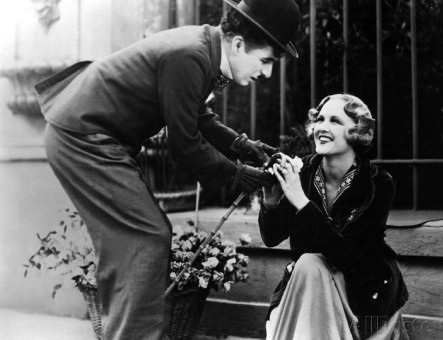

In [218]:
Image.open(r'C:\Users\Dmitrij\Pictures\img.jpg')

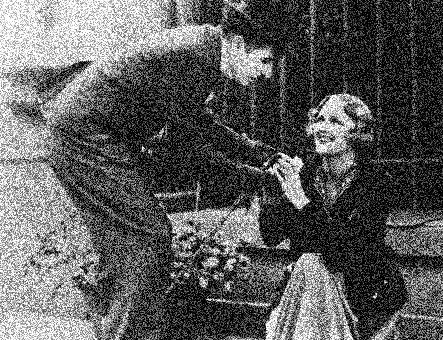

In [219]:
Image.open(r'ans.jpg')

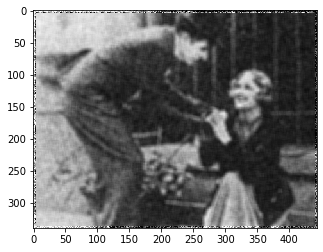

In [220]:
if __name__=="__main__":
    main()